https://geoscripting-wur.github.io/Earth_Engine/

Initialize earth engine and enable viewing images in Jupyter

In [5]:
import ee
ee.Initialize()
from IPython.display import Image

Import other packages

In [1]:
import pandas as pd


Set the date window

In [2]:
startDate='2016-01-01'
endDate='2017-01-01'

Set the search coordinate and create an earth engine point object from it

In [3]:
coords = [-83.38760375976562,41.793328494130215]

In [6]:
point = ee.Geometry.Point(coords)

Set the image collection, then filter it using date and location filters

In [7]:
l8_full_collection = ee.ImageCollection('LANDSAT/LC08/C01/T1_TOA')

In [8]:
#Spatial filter
spatialFiltered = l8_full_collection.filterBounds(point)
#print('spatialFiltered', spatialFiltered)

In [9]:
#Temporal filter
temporalFiltered = spatialFiltered.filterDate(startDate, endDate)
#print('temporalFiltered', temporalFiltered)

In [10]:
#The same filtering, all on one line
l8_filtered = l8_full_collection.filterBounds(point).filterDate(startDate,endDate)

### Show information about the [filtered] image collection
The `getInfo()` statement returns a dictionary of information about the filtered collection.<br>
Keys:
* `type`: the type of item (`ImageCollection` in this case)
* `bands`: a list of the bands in the collection
 * each item is a dictionary listing the `id` and `data_type` of the band
* `id`: the catalog id of the item (i.e. of the `ImageCollection`)
* `version`: the catalog version number of the item
* `properties`: a dictionary of properties of the item [see below]
* `features`: a list of features (i.e. images) contained in the collection
 * each feature is a dictionary of properties: [`type`, `bands`, `version`, `id`, `properties`]

In [11]:
#Create an object containing the information dictionary and reveal its keys
info = l8_filtered.getInfo()
info.keys()

dict_keys(['id', 'properties', 'type', 'version', 'bands', 'features'])

In [12]:
#Use the info's features item to get how many images were passed the filter
print("{} images returned".format(len(info['features'])))

17 images returned


In [13]:
#An alternate is to use the 'size()' function and use getInfo to convert that to a number...
print("{} images returned".format(l8_filtered.size().getInfo()))

17 images returned


In [14]:
#Print ()nicely) the properties of the image collection
from IPython.display import Markdown, display
x = l8_filtered.getInfo()['properties']
for k,v in x.items():
    string = "<h5>{}</h5> {}".format(k,v)
    display(Markdown(string))


<h5>description</h5> <p>Landsat 8 Collection 1 Tier 1
  calibrated top-of-atmosphere (TOA) reflectance.
  Calibration coefficients are extracted from the image metadata.  See
  <a href="http://www.sciencedirect.com/science/article/pii/S0034425709000169">
  Chander et al. (2009)</a> for details on the TOA computation.</p></p>
  <p><b>Revisit Interval</b>
    <br>
  16 days
</p>
<p><b>Bands</b>
<table class="eecat">
  <tr>
    <th scope="col">Name</th>
    <th scope="col">Resolution</th>
    <th scope="col">Wavelength</th>
    <th scope="col">Description</th>
  </tr>
  <tr>
    <td>B1</td>
    <td>
      30 meters
    </td>
    <td>0.43 - 0.45 µm</td>
    <td><p>Coastal aerosol</p></td>
  </tr>
  <tr>
    <td>B2</td>
    <td>
      30 meters
    </td>
    <td>0.45 - 0.51 µm</td>
    <td><p>Blue</p></td>
  </tr>
  <tr>
    <td>B3</td>
    <td>
      30 meters
    </td>
    <td>0.53 - 0.59 µm</td>
    <td><p>Green</p></td>
  </tr>
  <tr>
    <td>B4</td>
    <td>
      30 meters
    </td>
    <td>0.64 - 0.67 µm</td>
    <td><p>Red</p></td>
  </tr>
  <tr>
    <td>B5</td>
    <td>
      30 meters
    </td>
    <td>0.85 - 0.88 µm</td>
    <td><p>Near infrared</p></td>
  </tr>
  <tr>
    <td>B6</td>
    <td>
      30 meters
    </td>
    <td>1.57 - 1.65 µm</td>
    <td><p>Shortwave infrared 1</p></td>
  </tr>
  <tr>
    <td>B7</td>
    <td>
      30 meters
    </td>
    <td>2.11 - 2.29 µm</td>
    <td><p>Shortwave infrared 2</p></td>
  </tr>
  <tr>
    <td>B8</td>
    <td>
      15 meters
    </td>
    <td>0.52 - 0.90 µm</td>
    <td><p>Band 8 Panchromatic</p></td>
  </tr>
  <tr>
    <td>B9</td>
    <td>
      15 meters
    </td>
    <td>1.36 - 1.38 µm</td>
    <td><p>Cirrus</p></td>
  </tr>
  <tr>
    <td>B10</td>
    <td>
      30 meters
    </td>
    <td>10.60 - 11.19 µm</td>
    <td><p>Thermal infrared 1, resampled from 100m to 30m</p></td>
  </tr>
  <tr>
    <td>B11</td>
    <td>
      30 meters
    </td>
    <td>11.50 - 12.51 µm</td>
    <td><p>Thermal infrared 2, resampled from 100m to 30m</p></td>
  </tr>
  <tr>
    <td>BQA</td>
    <td>
    </td>
    <td></td>
    <td><p>Landsat Collection 1 QA Bitmask (<a href="https://landsat.usgs.gov/collectionqualityband">See Landsat QA page</a>)</p></td>
  </tr>
  <tr>
    <td colspan=100>
      Bitmask for BQA
      <ul>
        <li>
          Bit 0: Designated Fill
          <ul>
              <li>0: No</li>
              <li>1: Yes</li>
          </ul>
        </li>
        <li>
          Bit 1: Terrain Occlusion
          <ul>
              <li>0: No</li>
              <li>1: Yes</li>
          </ul>
        </li>
        <li>
          Bits 2-3: Radiometric Saturation
          <ul>
              <li>0: No bands contain saturation</li>
              <li>1: 1-2 bands contain saturation</li>
              <li>2: 3-4 bands contain saturation</li>
              <li>3: 5 or more bands contain saturation</li>
          </ul>
        </li>
        <li>
          Bit 4: Cloud
          <ul>
              <li>0: No</li>
              <li>1: Yes</li>
          </ul>
        </li>
        <li>
          Bits 5-6: Cloud Confidence
          <ul>
              <li>0: Not Determined / Condition does not exist.</li>
              <li>1: Low, (0-33 percent confidence)</li>
              <li>2: Medium, (34-66 percent confidence)</li>
              <li>3: High, (67-100 percent confidence)</li>
          </ul>
        </li>
        <li>
          Bits 7-8: Cloud Shadow Confidence
          <ul>
              <li>0: Not Determined / Condition does not exist.</li>
              <li>1: Low, (0-33 percent confidence)</li>
              <li>2: Medium, (34-66 percent confidence)</li>
              <li>3: High, (67-100 percent confidence)</li>
          </ul>
        </li>
        <li>
          Bits 9-10: Snow / Ice Confidence
          <ul>
              <li>0: Not Determined / Condition does not exist.</li>
              <li>1: Low, (0-33 percent confidence)</li>
              <li>2: Medium, (34-66 percent confidence)</li>
              <li>3: High, (67-100 percent confidence)</li>
          </ul>
        </li>
        <li>
          Bits 11-12: Cirrus Confidence
          <ul>
              <li>0: Not Determined / Condition does not exist.</li>
              <li>1: Low, (0-33 percent confidence)</li>
              <li>2: Medium, (34-66 percent confidence)</li>
              <li>3: High, (67-100 percent confidence)</li>
          </ul>
        </li>
      </ul>
    </td>
  </tr>
</table>
<p><b>Image Properties</b>
<table class="eecat">
  <tr>
    <th scope="col">Name</th>
    <th scope="col">Type</th>
    <th scope="col">Description</th>
  </tr>
  <tr>
    <td>BPF_NAME_OLI</td>
    <td>STRING</td>
    <td><p>The file name for the Bias Parameter File (BPF) used to generate the product, if applicable. This only applies to products that contain OLI bands.</p></td>
  </tr>
  <tr>
    <td>BPF_NAME_TIRS</td>
    <td>STRING</td>
    <td><p>The file name for the Bias Parameter File (BPF) used to generate the product, if applicable. This only applies to products that contain TIRS bands.</p></td>
  </tr>
  <tr>
    <td>CLOUD_COVER</td>
    <td>DOUBLE</td>
    <td><p>Percentage cloud cover, -1 = not calculated.</p></td>
  </tr>
  <tr>
    <td>CLOUD_COVER_LAND</td>
    <td>DOUBLE</td>
    <td><p>Percentage cloud cover over land, -1 = not calculated.</p></td>
  </tr>
  <tr>
    <td>COLLECTION_CATEGORY</td>
    <td>STRING</td>
    <td><p>Tier of scene. (T1 or T2)</p></td>
  </tr>
  <tr>
    <td>COLLECTION_NUMBER</td>
    <td>DOUBLE</td>
    <td><p>Number of collection.</p></td>
  </tr>
  <tr>
    <td>CPF_NAME</td>
    <td>STRING</td>
    <td><p>Calibration parameter file name.</p></td>
  </tr>
  <tr>
    <td>DATA_TYPE</td>
    <td>STRING</td>
    <td><p>Data type identifier. (L1T or L1G)</p></td>
  </tr>
  <tr>
    <td>DATE_ACQUIRED</td>
    <td>STRING</td>
    <td><p>Image acquisition date. "YYYY-MM-DD"</p></td>
  </tr>
  <tr>
    <td>DATUM</td>
    <td>STRING</td>
    <td><p>Datum used in image creation.</p></td>
  </tr>
  <tr>
    <td>EARTH_SUN_DISTANCE</td>
    <td>DOUBLE</td>
    <td><p>Earth sun distance in astronomical units (AU).</p></td>
  </tr>
  <tr>
    <td>ELEVATION_SOURCE</td>
    <td>STRING</td>
    <td><p>Elevation model source used for standard terrain corrected (L1T) products.</p></td>
  </tr>
  <tr>
    <td>ELLIPSOID</td>
    <td>STRING</td>
    <td><p>Ellipsoid used in image creation.</p></td>
  </tr>
  <tr>
    <td>EPHEMERIS_TYPE</td>
    <td>STRING</td>
    <td><p>Ephemeris data type used to perform geometric correction. (Definitive or Predictive)</p></td>
  </tr>
  <tr>
    <td>FILE_DATE</td>
    <td>DOUBLE</td>
    <td><p>File date in milliseconds since epoch.</p></td>
  </tr>
  <tr>
    <td>GEOMETRIC_RMSE_MODEL</td>
    <td>DOUBLE</td>
    <td><p>Combined Root Mean Square Error (RMSE) of the geometric residuals
(metres) in both across-track and along-track directions
measured on the GCPs used in geometric precision correction.
Not present in L1G products.</p></td>
  </tr>
  <tr>
    <td>GEOMETRIC_RMSE_MODEL_X</td>
    <td>DOUBLE</td>
    <td><p>RMSE of the X direction geometric residuals (in metres) measured
on the GCPs used in geometric precision correction. Not present in
L1G products.</p></td>
  </tr>
  <tr>
    <td>GEOMETRIC_RMSE_MODEL_Y</td>
    <td>DOUBLE</td>
    <td><p>RMSE of the Y direction geometric residuals (in metres) measured
on the GCPs used in geometric precision correction. Not present in
L1G products.</p></td>
  </tr>
  <tr>
    <td>GRID_CELL_SIZE_PANCHROMATIC</td>
    <td>DOUBLE</td>
    <td><p>Grid cell size used in creating the image for the panchromatic band.</p></td>
  </tr>
  <tr>
    <td>GRID_CELL_SIZE_REFLECTIVE</td>
    <td>DOUBLE</td>
    <td><p>Grid cell size used in creating the image for the reflective band.</p></td>
  </tr>
  <tr>
    <td>GRID_CELL_SIZE_THERMAL</td>
    <td>DOUBLE</td>
    <td><p>Grid cell size used in creating the image for the thermal band.</p></td>
  </tr>
  <tr>
    <td>GROUND_CONTROL_POINTS_MODEL</td>
    <td>DOUBLE</td>
    <td><p>The number of ground control points used. Not used in L1GT products.
Values: 0 - 999 (0 is used for L1T products that have used
Multi-scene refinement).</p></td>
  </tr>
  <tr>
    <td>GROUND_CONTROL_POINTS_VERSION</td>
    <td>DOUBLE</td>
    <td><p>The number of ground control points used in the verification of
the terrain corrected product. Values: -1 to 1615 (-1 = not available)</p></td>
  </tr>
  <tr>
    <td>IMAGE_QUALITY</td>
    <td>DOUBLE</td>
    <td><p>Image quality, 0 = worst, 9 = best, -1 = quality not calculated</p></td>
  </tr>
  <tr>
    <td>IMAGE_QUALITY_OLCI</td>
    <td>DOUBLE</td>
    <td><p>The composite image quality for the OLI bands. Values: 9 = Best. 1 = Worst. 0 = Image quality not calculated. This parameter is only present if OLI bands are present in the product.</p></td>
  </tr>
  <tr>
    <td>IMAGE_QUALITY_TIRS</td>
    <td>DOUBLE</td>
    <td><p>The composite image quality for the TIRS bands. Values: 9 = Best. 1 = Worst. 0 = Image quality not calculated. This parameter is only present if OLI bands are present in the product.</p></td>
  </tr>
  <tr>
    <td>K1_CONSTANT_BAND_10</td>
    <td>DOUBLE</td>
    <td><p>Calibration K1 constant for Band 10 radiance to temperature conversion.</p></td>
  </tr>
  <tr>
    <td>K1_CONSTANT_BAND_11</td>
    <td>DOUBLE</td>
    <td><p>Calibration K1 constant for Band 11 radiance to temperature conversion.</p></td>
  </tr>
  <tr>
    <td>K2_CONSTANT_BAND_10</td>
    <td>DOUBLE</td>
    <td><p>Calibration K2 constant for Band 10 radiance to temperature conversion.</p></td>
  </tr>
  <tr>
    <td>K2_CONSTANT_BAND_11</td>
    <td>DOUBLE</td>
    <td><p>Calibration K2 constant for Band 11 radiance to temperature conversion.</p></td>
  </tr>
  <tr>
    <td>LANDSAT_PRODUCT_ID</td>
    <td>STRING</td>
    <td><p>The naming convention of each Landsat Collection 1 Level-1 image based
on acquisition parameters and processing paramaters.</p>
<p>Format: LXSS_LLLL_PPPRRR_YYYYMMDD_yyyymmdd_CC_TX</p>
<ul>
<li>L = Landsat</li>
<li>X = Sensor (O = Operational Land Imager,
T = Thermal Infrared Sensor, C = Combined OLI/TIRS)</li>
<li>SS = Satellite (08 = Landsat 8)</li>
<li>LLLL = Processing Correction Level (L1TP = precision and terrain,
L1GT = systematic terrain, L1GS = systematic)</li>
<li>PPP = WRS Path</li>
<li>RRR = WRS Row</li>
<li>YYYYMMDD = Acquisition Date expressed in Year, Month, Day</li>
<li>yyyymmdd = Processing Date expressed in Year, Month, Day</li>
<li>CC = Collection Number (01)</li>
<li>TX = Collection Category (RT = Real Time, T1 = Tier 1, T2 = Tier 2)</li>
</ul></td>
  </tr>
  <tr>
    <td>LANDSAT_SCENE_ID</td>
    <td>STRING</td>
    <td><p>The Pre-Collection naming convention of each image is based on acquisition
parameters. This was the naming convention used prior to Collection 1.</p>
<p>Format: LXSPPPRRRYYYYDDDGSIVV</p>
<ul>
<li>L = Landsat</li>
<li>X = Sensor (O = Operational Land Imager, T = Thermal Infrared Sensor, C = Combined OLI/TIRS)</li>
<li>S = Satellite (08 = Landsat 8)</li>
<li>PPP = WRS Path</li>
<li>RRR = WRS Row</li>
<li>YYYY = Year of Acquisition</li>
<li>DDD = Julian Day of Acquisition</li>
<li>GSI = Ground Station Identifier</li>
<li>VV = Version</li>
</ul></td>
  </tr>
  <tr>
    <td>MAP_PROJECTION</td>
    <td>STRING</td>
    <td><p>Projection used to represent the 3-dimensional surface of the earth for the Level-1 product.</p></td>
  </tr>
  <tr>
    <td>NADIR_OFFNADIR</td>
    <td>STRING</td>
    <td><p>Nadir or Off-Nadir condition of the scene.</p></td>
  </tr>
  <tr>
    <td>ORIENTATION</td>
    <td>STRING</td>
    <td><p>Orientation used in creating the image. Values: NOMINAL = Nominal Path, NORTH_UP = North Up, TRUE_NORTH = True North, USER = User</p></td>
  </tr>
  <tr>
    <td>PANCHROMATIC_LINES</td>
    <td>DOUBLE</td>
    <td><p>Number of product lines for the panchromatic band.</p></td>
  </tr>
  <tr>
    <td>PANCHROMATIC_SAMPLES</td>
    <td>DOUBLE</td>
    <td><p>Number of product samples for the panchromatic bands.</p></td>
  </tr>
  <tr>
    <td>PROCESSING_SOFTWARE_VERSION</td>
    <td>STRING</td>
    <td><p>Name and version of the processing software used to generate the L1 product.</p></td>
  </tr>
  <tr>
    <td>RADIANCE_ADD_BAND_1</td>
    <td>DOUBLE</td>
    <td><p>Additive rescaling factor used to convert calibrated DN to radiance for Band 1.</p></td>
  </tr>
  <tr>
    <td>RADIANCE_ADD_BAND_10</td>
    <td>DOUBLE</td>
    <td><p>Additive rescaling factor used to convert calibrated DN to radiance for Band 10.</p></td>
  </tr>
  <tr>
    <td>RADIANCE_ADD_BAND_11</td>
    <td>DOUBLE</td>
    <td><p>Additive rescaling factor used to convert calibrated DN to radiance for Band 11.</p></td>
  </tr>
  <tr>
    <td>RADIANCE_ADD_BAND_2</td>
    <td>DOUBLE</td>
    <td><p>Additive rescaling factor used to convert calibrated DN to radiance for Band 2.</p></td>
  </tr>
  <tr>
    <td>RADIANCE_ADD_BAND_3</td>
    <td>DOUBLE</td>
    <td><p>Additive rescaling factor used to convert calibrated DN to radiance for Band 3.</p></td>
  </tr>
  <tr>
    <td>RADIANCE_ADD_BAND_4</td>
    <td>DOUBLE</td>
    <td><p>Additive rescaling factor used to convert calibrated DN to radiance for Band 4.</p></td>
  </tr>
  <tr>
    <td>RADIANCE_ADD_BAND_5</td>
    <td>DOUBLE</td>
    <td><p>Additive rescaling factor used to convert calibrated DN to radiance for Band 5.</p></td>
  </tr>
  <tr>
    <td>RADIANCE_ADD_BAND_6</td>
    <td>DOUBLE</td>
    <td><p>Additive rescaling factor used to convert calibrated DN to radiance for Band 6.</p></td>
  </tr>
  <tr>
    <td>RADIANCE_ADD_BAND_7</td>
    <td>DOUBLE</td>
    <td><p>Additive rescaling factor used to convert calibrated DN to radiance for Band 7.</p></td>
  </tr>
  <tr>
    <td>RADIANCE_ADD_BAND_8</td>
    <td>DOUBLE</td>
    <td><p>Additive rescaling factor used to convert calibrated DN to radiance for Band 8.</p></td>
  </tr>
  <tr>
    <td>RADIANCE_ADD_BAND_9</td>
    <td>DOUBLE</td>
    <td><p>Additive rescaling factor used to convert calibrated DN to radiance for Band 9.</p></td>
  </tr>
  <tr>
    <td>RADIANCE_MULT_BAND_1</td>
    <td>DOUBLE</td>
    <td><p>Multiplicative rescaling factor used to convert calibrated Band 1 DN to radiance.</p></td>
  </tr>
  <tr>
    <td>RADIANCE_MULT_BAND_10</td>
    <td>DOUBLE</td>
    <td><p>Multiplicative rescaling factor used to convert calibrated Band 10 DN to radiance.</p></td>
  </tr>
  <tr>
    <td>RADIANCE_MULT_BAND_11</td>
    <td>DOUBLE</td>
    <td><p>Multiplicative rescaling factor used to convert calibrated Band 11 DN to radiance.</p></td>
  </tr>
  <tr>
    <td>RADIANCE_MULT_BAND_2</td>
    <td>DOUBLE</td>
    <td><p>Multiplicative rescaling factor used to convert calibrated Band 2 DN to radiance.</p></td>
  </tr>
  <tr>
    <td>RADIANCE_MULT_BAND_3</td>
    <td>DOUBLE</td>
    <td><p>Multiplicative rescaling factor used to convert calibrated Band 3 DN to radiance.</p></td>
  </tr>
  <tr>
    <td>RADIANCE_MULT_BAND_4</td>
    <td>DOUBLE</td>
    <td><p>Multiplicative rescaling factor used to convert calibrated Band 4 DN to radiance.</p></td>
  </tr>
  <tr>
    <td>RADIANCE_MULT_BAND_5</td>
    <td>DOUBLE</td>
    <td><p>Multiplicative rescaling factor used to convert calibrated Band 5 DN to radiance.</p></td>
  </tr>
  <tr>
    <td>RADIANCE_MULT_BAND_6</td>
    <td>DOUBLE</td>
    <td><p>Multiplicative rescaling factor used to convert calibrated Band 6 DN to radiance.</p></td>
  </tr>
  <tr>
    <td>RADIANCE_MULT_BAND_7</td>
    <td>DOUBLE</td>
    <td><p>Multiplicative rescaling factor used to convert calibrated Band 7 DN to radiance.</p></td>
  </tr>
  <tr>
    <td>RADIANCE_MULT_BAND_8</td>
    <td>DOUBLE</td>
    <td><p>Multiplicative rescaling factor used to convert calibrated Band 8 DN to radiance.</p></td>
  </tr>
  <tr>
    <td>RADIANCE_MULT_BAND_9</td>
    <td>DOUBLE</td>
    <td><p>Multiplicative rescaling factor used to convert calibrated Band 9 DN to radiance.</p></td>
  </tr>
  <tr>
    <td>REFLECTANCE_ADD_BAND_1</td>
    <td>DOUBLE</td>
    <td><p>Additive rescaling factor used to convert calibrated Band 1 DN to reflectance.</p></td>
  </tr>
  <tr>
    <td>REFLECTANCE_ADD_BAND_2</td>
    <td>DOUBLE</td>
    <td><p>Additive rescaling factor used to convert calibrated Band 2 DN to reflectance.</p></td>
  </tr>
  <tr>
    <td>REFLECTANCE_ADD_BAND_3</td>
    <td>DOUBLE</td>
    <td><p>Additive rescaling factor used to convert calibrated Band 3 DN to reflectance.</p></td>
  </tr>
  <tr>
    <td>REFLECTANCE_ADD_BAND_4</td>
    <td>DOUBLE</td>
    <td><p>Additive rescaling factor used to convert calibrated Band 4 DN to reflectance.</p></td>
  </tr>
  <tr>
    <td>REFLECTANCE_ADD_BAND_5</td>
    <td>DOUBLE</td>
    <td><p>Additive rescaling factor used to convert calibrated Band 5 DN to reflectance.</p></td>
  </tr>
  <tr>
    <td>REFLECTANCE_ADD_BAND_7</td>
    <td>DOUBLE</td>
    <td><p>Multiplicative factor used to convert calibrated Band 7 DN to reflectance.</p></td>
  </tr>
  <tr>
    <td>REFLECTANCE_ADD_BAND_8</td>
    <td>DOUBLE</td>
    <td><p>Multiplicative factor used to convert calibrated Band 8 DN to reflectance.</p></td>
  </tr>
  <tr>
    <td>REFLECTANCE_ADD_BAND_9</td>
    <td>DOUBLE</td>
    <td><p>Minimum achievable spectral reflectance value for Band 8.</p></td>
  </tr>
  <tr>
    <td>REFLECTANCE_MULT_BAND_1</td>
    <td>DOUBLE</td>
    <td><p>Multiplicative factor used to convert calibrated Band 1 DN to reflectance.</p></td>
  </tr>
  <tr>
    <td>REFLECTANCE_MULT_BAND_2</td>
    <td>DOUBLE</td>
    <td><p>Multiplicative factor used to convert calibrated Band 2 DN to reflectance.</p></td>
  </tr>
  <tr>
    <td>REFLECTANCE_MULT_BAND_3</td>
    <td>DOUBLE</td>
    <td><p>Multiplicative factor used to convert calibrated Band 3 DN to reflectance.</p></td>
  </tr>
  <tr>
    <td>REFLECTANCE_MULT_BAND_4</td>
    <td>DOUBLE</td>
    <td><p>Multiplicative factor used to convert calibrated Band 4 DN to reflectance.</p></td>
  </tr>
  <tr>
    <td>REFLECTANCE_MULT_BAND_5</td>
    <td>DOUBLE</td>
    <td><p>Multiplicative factor used to convert calibrated Band 5 DN to reflectance.</p></td>
  </tr>
  <tr>
    <td>REFLECTANCE_MULT_BAND_6</td>
    <td>DOUBLE</td>
    <td><p>Multiplicative factor used to convert calibrated Band 6 DN to reflectance.</p></td>
  </tr>
  <tr>
    <td>REFLECTANCE_MULT_BAND_7</td>
    <td>DOUBLE</td>
    <td><p>Multiplicative factor used to convert calibrated Band 7 DN to reflectance.</p></td>
  </tr>
  <tr>
    <td>REFLECTANCE_MULT_BAND_8</td>
    <td>DOUBLE</td>
    <td><p>Multiplicative factor used to convert calibrated Band 8 DN to reflectance.</p></td>
  </tr>
  <tr>
    <td>REFLECTANCE_MULT_BAND_9</td>
    <td>DOUBLE</td>
    <td><p>Multiplicative factor used to convert calibrated Band 9 DN to reflectance.</p></td>
  </tr>
  <tr>
    <td>REFLECTIVE_LINES</td>
    <td>DOUBLE</td>
    <td><p>Number of product lines for the reflective bands.</p></td>
  </tr>
  <tr>
    <td>REFLECTIVE_SAMPLES</td>
    <td>DOUBLE</td>
    <td><p>Number of product samples for the reflective bands.</p></td>
  </tr>
  <tr>
    <td>REQUEST_ID</td>
    <td>STRING</td>
    <td><p>Request id, nnnyymmdd0000_0000</p>
<ul>
<li>nnn = node number</li>
<li>yy = year</li>
<li>mm = month</li>
<li>dd = day</li>
</ul></td>
  </tr>
  <tr>
    <td>RESAMPLING_OPTION</td>
    <td>STRING</td>
    <td><p>Resampling option used in creating the image.</p></td>
  </tr>
  <tr>
    <td>RLUT_FILE_NAME</td>
    <td>STRING</td>
    <td><p>The file name for the Response Linearization Lookup Table (RLUT) used to generate the product, if applicable.</p></td>
  </tr>
  <tr>
    <td>ROLL_ANGLE</td>
    <td>DOUBLE</td>
    <td><p>The amount of spacecraft roll angle at the scene center.</p></td>
  </tr>
  <tr>
    <td>SATURATION_BAND_1</td>
    <td>STRING</td>
    <td><p>Flag indicating saturated pixels for band 1 ('Y'/'N')</p></td>
  </tr>
  <tr>
    <td>SATURATION_BAND_10</td>
    <td>STRING</td>
    <td><p>Flag indicating saturated pixels for band 10 ('Y'/'N')</p></td>
  </tr>
  <tr>
    <td>SATURATION_BAND_11</td>
    <td>STRING</td>
    <td><p>Flag indicating saturated pixels for band 11 ('Y'/'N')</p></td>
  </tr>
  <tr>
    <td>SATURATION_BAND_2</td>
    <td>STRING</td>
    <td><p>Flag indicating saturated pixels for band 2 ('Y'/'N')</p></td>
  </tr>
  <tr>
    <td>SATURATION_BAND_3</td>
    <td>STRING</td>
    <td><p>Flag indicating saturated pixels for band 3 ('Y'/'N')</p></td>
  </tr>
  <tr>
    <td>SATURATION_BAND_4</td>
    <td>STRING</td>
    <td><p>Flag indicating saturated pixels for band 4 ('Y'/'N')</p></td>
  </tr>
  <tr>
    <td>SATURATION_BAND_5</td>
    <td>STRING</td>
    <td><p>Flag indicating saturated pixels for band 5 ('Y'/'N')</p></td>
  </tr>
  <tr>
    <td>SATURATION_BAND_6</td>
    <td>STRING</td>
    <td><p>Flag indicating saturated pixels for band 6 ('Y'/'N')</p></td>
  </tr>
  <tr>
    <td>SATURATION_BAND_7</td>
    <td>STRING</td>
    <td><p>Flag indicating saturated pixels for band 7 ('Y'/'N')</p></td>
  </tr>
  <tr>
    <td>SATURATION_BAND_8</td>
    <td>STRING</td>
    <td><p>Flag indicating saturated pixels for band 8 ('Y'/'N')</p></td>
  </tr>
  <tr>
    <td>SATURATION_BAND_9</td>
    <td>STRING</td>
    <td><p>Flag indicating saturated pixels for band 9 ('Y'/'N')</p></td>
  </tr>
  <tr>
    <td>SCENE_CENTER_TIME</td>
    <td>STRING</td>
    <td><p>Scene center time of acquired image. HH:MM:SS.SSSSSSSZ</p>
<ul>
<li>HH = Hour (00-23)</li>
<li>MM = Minutes</li>
<li>SS.SSSSSSS = Fractional seconds</li>
<li>Z = "Zulu" time (same as GMT)</li>
</ul></td>
  </tr>
  <tr>
    <td>SENSOR_ID</td>
    <td>STRING</td>
    <td><p>Sensor used to capture data.</p></td>
  </tr>
  <tr>
    <td>SPACECRAFT_ID</td>
    <td>STRING</td>
    <td><p>Spacecraft identification.</p></td>
  </tr>
  <tr>
    <td>STATION_ID</td>
    <td>STRING</td>
    <td><p>Ground Station/Organisation that received the data.</p></td>
  </tr>
  <tr>
    <td>SUN_AZIMUTH</td>
    <td>DOUBLE</td>
    <td><p>Sun azimuth angle in degrees for the image center location at the image centre acquisition time.</p></td>
  </tr>
  <tr>
    <td>SUN_ELEVATION</td>
    <td>DOUBLE</td>
    <td><p>Sun elevation angle in degrees for the image center location at the image centre acquisition time.</p></td>
  </tr>
  <tr>
    <td>TARGET_WRS_PATH</td>
    <td>DOUBLE</td>
    <td><p>Nearest WRS-2 path to the line-of-sight scene center of the image.</p></td>
  </tr>
  <tr>
    <td>TARGET_WRS_ROW</td>
    <td>DOUBLE</td>
    <td><p>Nearest WRS-2 row to the line-of-sight scene center of the image. Rows 880-889 and 990-999 are reserved for the polar regions where it is undefined in the WRS-2.</p></td>
  </tr>
  <tr>
    <td>THERMAL_LINES</td>
    <td>DOUBLE</td>
    <td><p>Number of product lines for the thermal band.</p></td>
  </tr>
  <tr>
    <td>THERMAL_SAMPLES</td>
    <td>DOUBLE</td>
    <td><p>Number of product samples for the thermal band.</p></td>
  </tr>
  <tr>
    <td>TIRS_SSM_MODEL</td>
    <td>STRING</td>
    <td><p>Due to an anomalous condition on the Thermal Infrared
Sensor (TIRS) Scene Select Mirror (SSM) encoder electronics,
this field has been added to indicate which model was used to process the data.
(Actual, Preliminary, Final)</p></td>
  </tr>
  <tr>
    <td>TIRS_SSM_POSITION_STATUS</td>
    <td>STRING</td>
    <td><p>TIRS SSM position status.</p></td>
  </tr>
  <tr>
    <td>TIRS_STRAY_LIGHT_CORRECTION_SOURCE</td>
    <td>STRING</td>
    <td><p>TIRS stray light correction source.</p></td>
  </tr>
  <tr>
    <td>TRUNCATION_OLI</td>
    <td>STRING</td>
    <td><p>Region of OLCI truncated.</p></td>
  </tr>
  <tr>
    <td>UTM_ZONE</td>
    <td>DOUBLE</td>
    <td><p>UTM zone number used in product map projection.</p></td>
  </tr>
  <tr>
    <td>WRS_PATH</td>
    <td>DOUBLE</td>
    <td><p>The WRS orbital path number (001 - 251).</p></td>
  </tr>
  <tr>
    <td>WRS_ROW</td>
    <td>DOUBLE</td>
    <td><p>Landsat satellite WRS row (001-248).</p></td>
  </tr>
</table>
<style>
  table.eecat {
  border: 1px solid black;
  border-collapse: collapse;
  font-size: 13px;
  }
  table.eecat td, tr, th {
  text-align: left; vertical-align: top;
  border: 1px solid gray; padding: 3px;
  }
  td.nobreak { white-space: nowrap; }
</style>

<h5>date_range</h5> [1365638400000.0, 1531526400000.0]

<h5>system:visualization_0_max</h5> 30000.0

<h5>tags</h5> ['landsat', 'usgs', 'global', 'toa', 't1', 'l8', 'c1', 'oli_tirs', 'lc8', 'radiance', 'tier1']

<h5>system:visualization_2_gain</h5> 500.0

<h5>system:visualization_2_bands</h5> B7,B5,B3

<h5>system:visualization_0_bands</h5> B4,B3,B2

<h5>source_tags</h5> ['landsat', 'usgs']

<h5>system:visualization_0_name</h5> True Color (432)

<h5>system:visualization_1_min</h5> 0.0

<h5>system:visualization_2_name</h5> Shortwave Infrared (753)

<h5>system:visualization_2_max</h5> 30000.0

<h5>thumb</h5> https://mw1.google.com/ges/dd/images/LANDSAT_TOA_thumb.png

<h5>period</h5> 0.0

<h5>system:visualization_2_min</h5> 0.0

<h5>system:visualization_1_bands</h5> B5,B4,B3

<h5>system:visualization_1_gain</h5> 500.0

<h5>system:visualization_0_min</h5> 0.0

<h5>system:visualization_1_max</h5> 30000.0

<h5>sample</h5> https://mw1.google.com/ges/dd/images/LANDSAT_TOA_sample.png

<h5>system:visualization_1_name</h5> Near Infrared (543)

<h5>title</h5> USGS Landsat 8 Collection 1 Tier 1 TOA Reflectance

<h5>provider_url</h5> http://landsat.usgs.gov/

<h5>product_tags</h5> ['global', 'toa', 't1', 'l8', 'c1', 'oli_tirs', 'lc8', 'radiance', 'tier1']

<h5>provider</h5> Google

<h5>system:visualization_0_gain</h5> 500.0

In [15]:
#Get the info for the first feature (i.e. image) in the collection and display info of it
imageInfo = info['features'][0]
imageInfo.keys()

dict_keys(['id', 'bands', 'properties', 'type', 'version'])

In [ ]:
imageInfo['id']

In [ ]:
imageInfo['properties']

In [ ]:
#Use pandas to show feature bands as a dataframe
import pandas as pd
dfFeatures = pd.DataFrame.from_dict(imageInfo['bands'])
dfFeatures

## Get info at a specific point from the filtered image collection

In [16]:
ptInfo = l8_filtered.getRegion(point,30).getInfo()
print("{} records returned".format(len(ptInfo)-1))

17 records returned


### Convert the result to a dataframe
The first record is the column names; the remaining are the records for each image in the collection

In [17]:
#Convert all but the first record to a dataframe 
dfPoint = pd.DataFrame(ptInfo[1:])
#Use the first record to assigne column names
dfPoint.columns = ptInfo[0]
#Convert the time stamp to a redable time
dfPoint['time'] = pd.to_datetime(dfPoint['time']/1000,unit='s')
#Should be a row for each image, and column for each attribute
dfPoint.shape

(17, 16)

In [18]:
#dfPoint.set_index(dfPoint['id'],drop=True,inplace=True)
dfPoint.head()

,id,longitude,latitude,time,B1,B2,B3,B4,B5,B6,B7,B8,B9,B10,B11,BQA
0,LC08_020031_20160111,-83.387688,41.793355,2016-01-11 16:16:37.839999914,0.218580,0.199685,0.183360,0.186232,0.098810,0.036682,0.023783,0.173484,0.003678,271.481140,270.124634,2720
1,LC08_020031_20160228,-83.387688,41.793355,2016-02-28 16:16:27.089999914,0.188696,0.170278,0.145608,0.116724,0.093957,0.063238,0.054539,0.130724,0.040947,263.341888,263.562561,6896
2,LC08_020031_20160315,-83.387688,41.793355,2016-03-15 16:16:23.039999962,0.682696,0.675816,0.633287,0.660329,0.708755,0.525208,0.418617,0.648535,0.052417,266.988983,264.588928,6896
3,LC08_020031_20160416,-83.387688,41.793355,2016-04-16 16:16:07.960000038,0.145753,0.133632,0.132498,0.108305,0.023972,0.005593,0.003597,0.120599,0.001429,280.994507,281.337280,2720
4,LC08_020031_20160518,-83.387688,41.793355,2016-05-18 16:16:08.140000105,0.145276,0.129563,0.117740,0.086001,0.042439,0.028502,0.023917,0.100814,0.001259,284.546478,284.015137,2720


### Plot

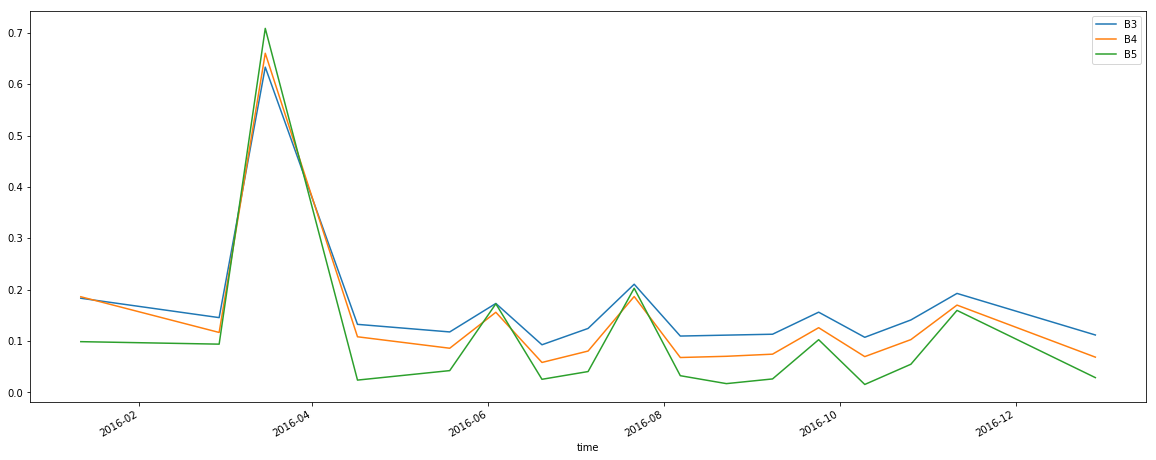

In [28]:
plt = dfPoint.set_index('time')[['B3','B4','B5']].plot(figsize=(20,8))
plt

In [30]:
b3 = l8_filtered.select('B3')

In [31]:
b3_mean = b3.reduce('mean')

In [33]:
b3_mean

### Sort and select images

In [34]:
sorted = temporalFiltered.sort('CLOUD_COVER')
scene = ee.Image(sorted.first())

In [46]:
#True color
Image(url=scene.getThumbURL({'bands':('B4,B3,B2'),'min':0,'max':0.3}))

In [49]:
#False color
Image(url=scene.getThumbURL({'bands':('B5,B3,B4'),'min':0,'max':0.3}))